<a href="https://colab.research.google.com/github/stellaetcorpus/Learn-Analyst-/blob/main/Proyek_Analisis_Data_Pengantar_Kriteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Analisis Data: Bike Sharing Dataset**



*   Nama : Bintang Raga Pratama
*   Email : bintangraga@gmail.com
*   id Dicoding: MS092D5Y0491



# **Menentukan Pertanyaan Bisnis**


*   Kapan waktu paling sibuk untuk penyewaan sepeda (jam, hari, bulan)?
*Bagaimana pola penggunaan sepeda antara hari kerja dan akhir pekan?
*Seberapa besar pengaruh musim terhadap jumlah penyewaan sepeda?
*Siapa yang lebih sering menggunakan layanan: pengguna terdaftar atau pengguna casual?


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **Gathering Data**

In [17]:
day=pd.read_csv('/content/Bike Dataset/day.csv')
hour=pd.read_csv('/content/Bike Dataset/hour.csv')

In [18]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# **Assesing Data**

In [20]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [21]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [22]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [23]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [24]:
day.isna().sum()
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [25]:
day.duplicated().sum()
hour.duplicated().sum()

0

In [26]:
print(day['season'].unique())
print(hour['season'].unique())

[1 2 3 4]
[1 2 3 4]


In [27]:
print(day['weathersit'].unique())
print(hour['weathersit'].unique())

[2 1 3]
[1 2 3 4]


# **Cleaning Data**

In [28]:
# kita akan menghapus kolom yang tidak di gunakan,yaitu:
# instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.
# windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.

drop_col =['instant','windspeed']

for i in day.columns:
  if i in drop_col:
    day.drop(labels=i,axis=1,inplace=True)
day.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [29]:
# merubah detail di colom yang agar mudah di mengerti

day.rename(columns={
    'dteday':'dateday',
    'yr':'year',
    'mnth':'month',
    'holiday':'isholiday',
    'weekday':'dayofweek',
    'workingday':'isworkingday',
    'weathersit':'weathersit'
},inplace=True)
day.head()

,dateday,season,year,month,isholiday,dayofweek,isworkingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [30]:
# memberikan keterangan pada setiap angka di columns

day['month']=day['month'].map({
    1:'januari',
    2:'februari',
    3:'maret',
    4:'april',
    5:'mei',
    6:'juni',
    7:'juli',
    8:'agustus',
    9:'september',
    10:'oktober',
    11:'november',
    12:'desember'
})

In [32]:
day['dayofweek']=day['dayofweek'].map({
    0:'senin',
    1:'selasa',
    2:'rabu',
    3:'kamis',
    4:'jumat',
    5:'sabtu',
    6:'minggu'
})

In [33]:
day['season']=day['season'].map=({
    1:'spring',
    2:'summer',
    3:'fall',
    4:'winter'
})

In [34]:
day['weathersit']=day['weathersit'].map=({
    1:'Clear/Partly Cloudy',
    2:'Misty/Cloudy',
    3:'Light Snow/Rain',
    4:'Severe Weather'
})

In [37]:
# mengubah tipe data ke datetime agar sesuai
day['dateday']=pd.to_datetime(day.dateday)

In [38]:
# mengubah tipe data jadi object

day['year']=day['year'].astype('object')
day['month']=day['month'].astype('object')
day['dayofweek']=day['dayofweek'].astype('object')
day['season']=day['season'].astype('object')
day['weathersit']=day['weathersit'].astype('object')
day['isholiday']=day['isholiday'].astype('object')
day['isworkingday']=day['isworkingday'].astype('object')

In [58]:
# Mengelompokkan data berdasarkan 'isworkingday' (hari kerja atau akhir pekan)
day['day_type'] = day['isworkingday'].map({0: 'Weekend', 1: 'Weekday'})

# **Visualisasi Data**

**1.Kapan waktu paling sibuk untuk penyewaan sepeda (jam, hari, bulan)?**

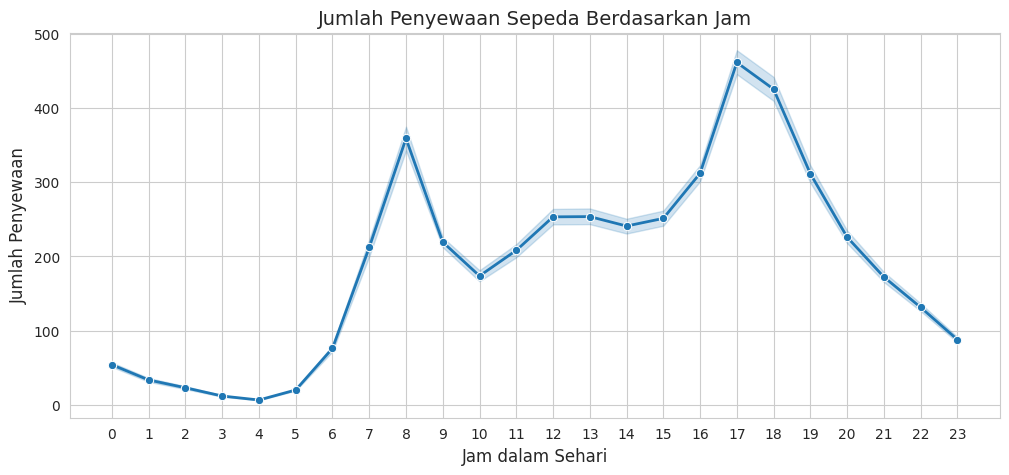

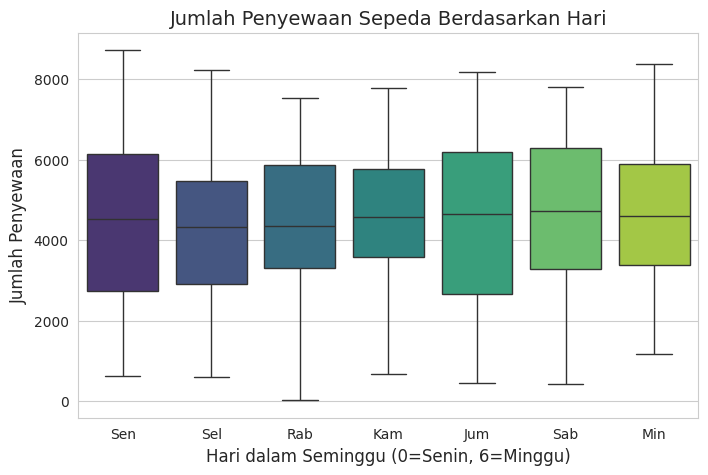

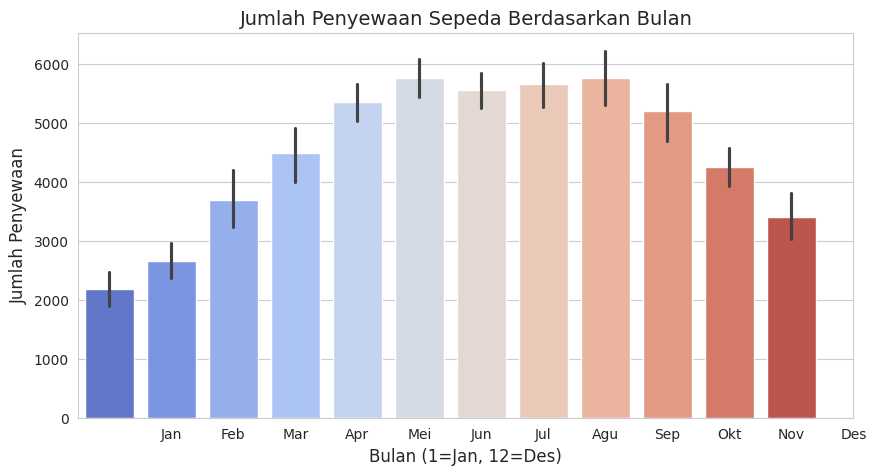

In [51]:
sns.set_style("whitegrid")

# 1. Visualisasi Penyewaan Berdasarkan Jam
plt.figure(figsize=(12, 5))
sns.lineplot(x=hour['hr'], y=hour['cnt'], marker="o", linewidth=2)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Jam", fontsize=14)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

# 2. Visualisasi Penyewaan Berdasarkan Hari
plt.figure(figsize=(8, 5))
sns.boxplot(x=day['dayofweek'], y=day['cnt'], hue=day['dayofweek'], palette="viridis", legend=False)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Hari", fontsize=14)
plt.xlabel("Hari dalam Seminggu (0=Senin, 6=Minggu)", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(ticks=range(7), labels=['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.show()

# 3. Visualisasi Penyewaan Berdasarkan Bulan
plt.figure(figsize=(10, 5))
sns.barplot(x=day['month'], y=day['cnt'], hue=day['month'], palette="coolwarm", legend=False)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Bulan", fontsize=14)
plt.xlabel("Bulan (1=Jan, 12=Des)", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()


**kesimpulan :**

*   Mayoritas Penyewa sepeda paling sibuk jam 5 sore dan paling sepi jam 4 pagi

*   Penyewaan lebih tinggi di hari kerja dibandingkan akhir pekan, menunjukkan banyaknya pengguna reguler seperti pekerja dan pelajar.
*   Jumlah penyewa berdasarkan bulan paling tinggi di mei-agustus




**2.Bagaimana pola penggunaan sepeda antara hari kerja dan akhir pekan?**

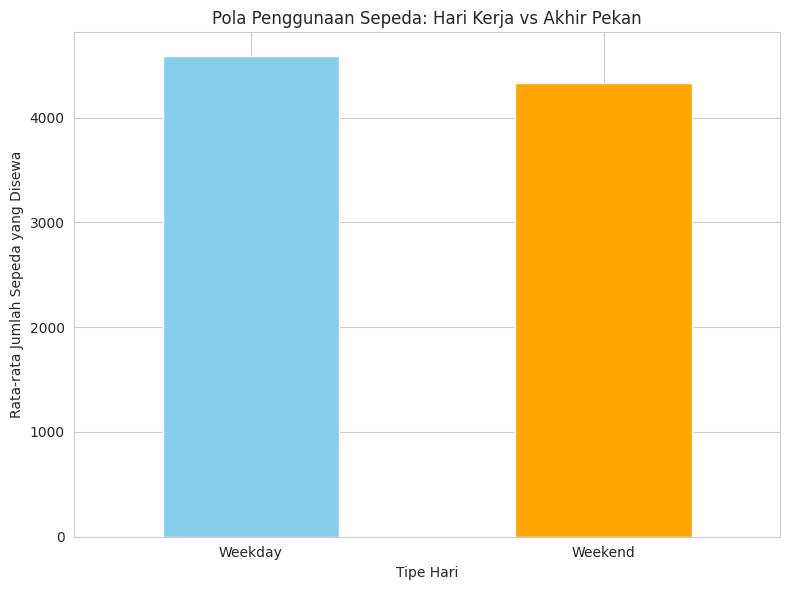

In [61]:
usage_by_day_type = day.groupby('day_type')['cnt'].mean()

plt.figure(figsize=(8, 6))
usage_by_day_type.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Pola Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.xlabel('Tipe Hari')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**kesimpulan:**


*   Penguna Pada hari kerja lebih banyak dari pada hari libur



**3.Seberapa besar pengaruh musim terhadap jumlah penyewaan sepeda?**

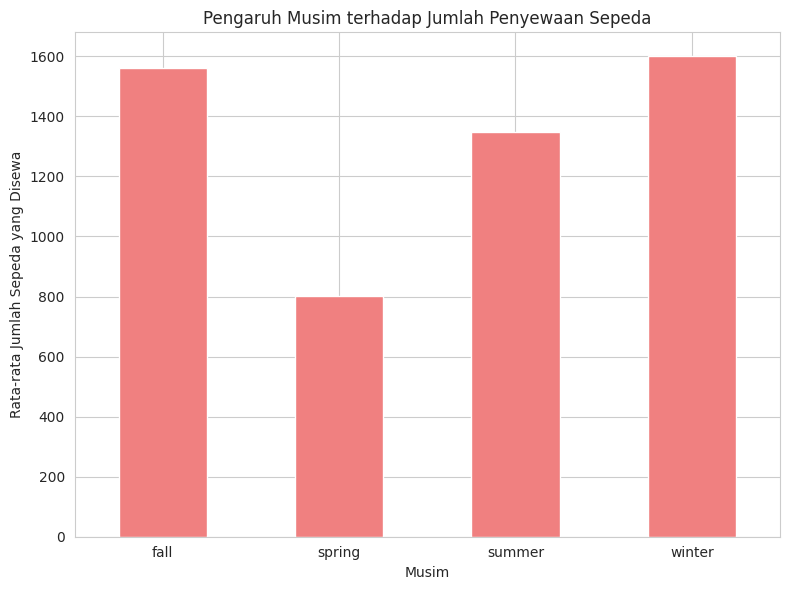

In [64]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata jumlah sepeda yang disewa
usage_by_season = day.groupby('season')['cnt'].mean()

plt.figure(figsize=(8, 6))
usage_by_season.plot(kind='bar', color='lightcoral')
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.xlabel('Musim')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Kesimpulan :**
Winter (musim dingin) dan Fall (musim gugur) cenderung menunjukkan jumlah

* penyewaan sepeda yang lebih tinggi, kemungkinan karena meskipun cuaca lebih dingin, aktivitas bersepeda tetap banyak dilakukan, mungkin karena cuaca yang lebih stabil atau faktor lainnya.
* Summer (musim panas) menunjukkan angka yang sedikit lebih rendah dibandingkan dengan Winter dan Fall, meskipun musim panas biasanya menarik untuk beraktivitas di luar ruangan.
* Spring (musim semi) menunjukkan angka penyewaan sepeda yang lebih rendah dibandingkan musim lainnya, yang mungkin disebabkan oleh faktor cuaca yang tidak konsisten atau peralihan musim yang mempengaruhi minat bersepeda.

**4.Siapa yang lebih sering menggunakan layanan: pengguna terdaftar atau pengguna casual?**

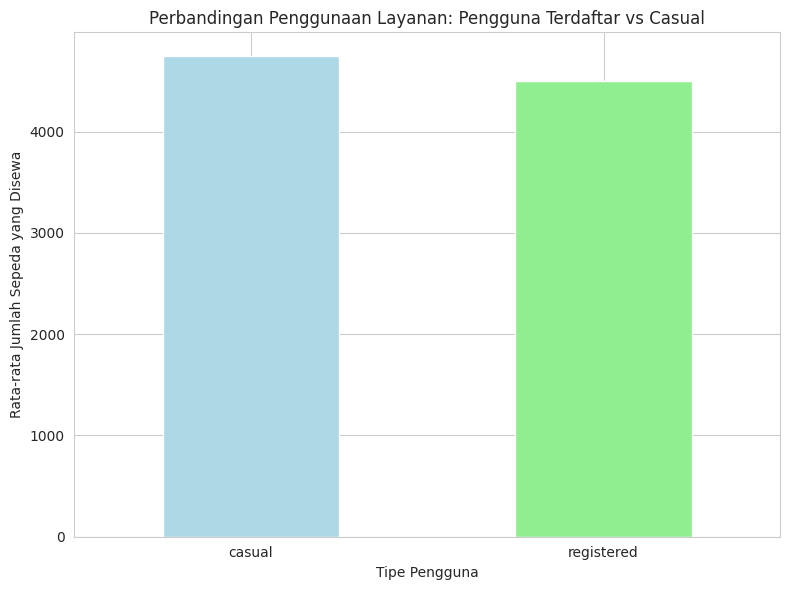

In [70]:

if 'user_type' not in day.columns:
    day['user_type'] = ['casual' if c >= r else 'registered' for c, r in zip(day['casual'], day['registered'])]

usage_by_user_type = day.groupby('user_type')['cnt'].mean()

# Visualisasi perbandingan antara pengguna terdaftar dan casual
plt.figure(figsize=(8, 6))
usage_by_user_type.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Perbandingan Penggunaan Layanan: Pengguna Terdaftar vs Casual')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.xlabel('Tipe Pengguna')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Kesimpulan:**

*   Penguna Casual Lebih Sering Megunakan pelayanan daripada registered




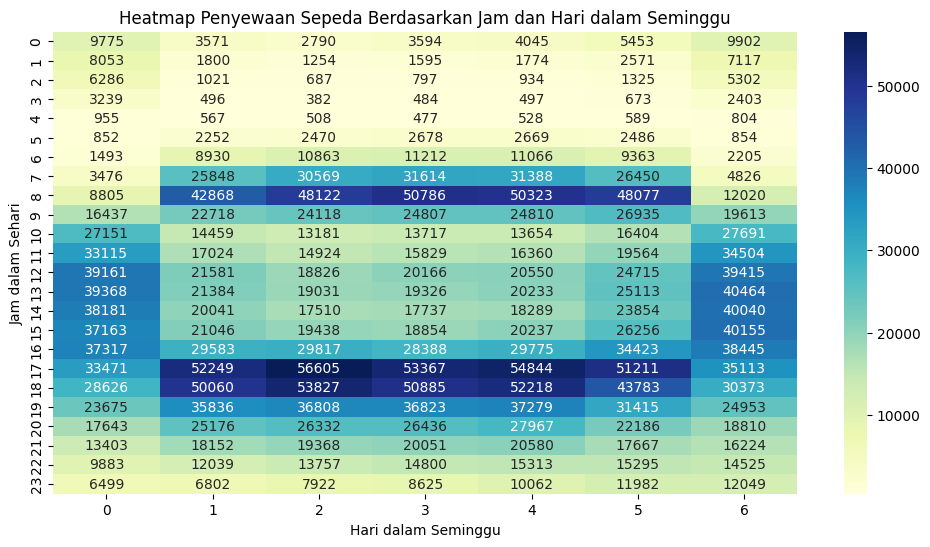

In [ ]:
# Membuat pivot table untuk heatmap
# untuk kesimpulan data selama seminggu
hour_pivot = hour.pivot_table(index='hr', columns='weekday', values='cnt', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(hour_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap Penyewaan Sepeda Berdasarkan Jam dan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jam dalam Sehari')
plt.show()


In [86]:
today = day['dateday'].max()
day['recency'] = (today - day['dateday']).dt.days

# Menentukan 'user_id' berdasarkan kolom 'casual' dan 'registered'
day['user_id'] = day.apply(lambda row: 'casual' if row['casual'] > row['registered'] else 'registered', axis=1)

# Menghitung Frequency (jumlah transaksi per pengguna)
frequency = day.groupby('user_id')['cnt'].count().reset_index()
frequency = frequency.rename(columns={'cnt': 'frequency'})

# Menghitung Monetary (total pengeluaran atau total penyewaan)
monetary = day.groupby('user_id')['cnt'].sum().reset_index()
monetary = monetary.rename(columns={'cnt': 'monetary'})

# Menggabungkan Recency, Frequency, dan Monetary
rfm_df = pd.merge(frequency, monetary, on='user_id')
rfm_df = pd.merge(rfm_df, day[['user_id', 'recency']].drop_duplicates(), on='user_id')
# Menampilkan hasil RFM
print(rfm_df.head())


      user_id  frequency  monetary  recency
0      casual          3     14232      638
1      casual          3     14232      546
2      casual          3     14232      484
3  registered        728   3278447      730
4  registered        728   3278447      729
